# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [ ]:
X_test = pd.read_csv("X_test.csv", delimiter=',')
X_train = pd.read_csv("X_train_balanced.csv", delimiter=',')
y_test = pd.read_csv("y_test.csv", delimiter=',')
y_train = pd.read_csv("y_train_balanced.csv", delimiter=',')

In [ ]:
X_test

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_encoded,Pais_encoded
0,686,36.0,3,95848.58,2,0.0,1.0,7144694.0,1,0
1,703,35.0,1,0.00,1,1.0,1.0,14136462.0,1,0
2,730,26.0,6,0.00,1,1.0,1.0,1011687.0,1,2
3,675,33.0,6,0.00,2,0.0,1.0,1011687.0,0,0
4,754,24.0,3,121513.31,2,0.0,1.0,1011687.0,0,1
...,...,...,...,...,...,...,...,...,...,...
24922,786,37.0,4,0.00,2,0.0,1.0,1011687.0,0,2
24923,592,35.0,7,122724.50,1,1.0,1.0,17773874.0,1,0
24924,645,45.0,7,121286.32,1,1.0,1.0,869372.0,1,0
24925,567,47.0,1,126447.40,1,1.0,0.0,1011687.0,0,1


In [ ]:
y_test

,Churn
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
24922,0.0
24923,0.0
24924,0.0
24925,1.0


In [ ]:
X_train

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_encoded,Pais_encoded
0,711,35.000000,10,0.000000,2,1.000000,0.000000,5331178.0,1,0
1,619,33.000000,7,0.000000,2,0.000000,1.000000,1011687.0,1,0
2,841,54.000000,4,102721.490000,1,1.000000,1.000000,1011687.0,1,1
3,679,48.000000,6,125161.240000,1,1.000000,0.000000,579659.0,1,0
4,656,42.000000,6,0.000000,3,0.000000,0.000000,14233155.0,0,0
...,...,...,...,...,...,...,...,...,...,...
117945,529,43.000000,7,0.000000,1,0.514157,0.000000,1011687.0,1,2
117946,639,44.450575,7,0.000000,1,1.000000,0.725287,1011687.0,0,2
117947,541,49.890057,6,102744.063633,1,1.000000,0.000000,1011687.0,0,1
117948,593,37.911470,5,139949.785268,1,1.000000,0.000000,1011687.0,0,1


In [ ]:
y_train

,Churn
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
117945,1.0
117946,1.0
117947,1.0
117948,1.0


In [ ]:
verifica_classes = y_train.value_counts()
verifica_classes

,count
Churn,
0.0,58975
1.0,58975


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

1- Verificação do problema para ver se uma classificação ou  regressão, de acordo com a base que temos, no nosso caso é um churn = classificação

2- Realizar o tratamento de dados, como arrumar os dados para ficarem certo, tirar ou arrumar inconsistencias

3- Realizar a conversão da analise categoricas se for nescessario

4- Separar a base em treino e teste

5- Utilizar a base teste e treino e treinar o modelo de machine learning

6- Utilizar a avaliação do modelo com f1-score, acurácia, recall e precisão


# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [ ]:
arvore_churn = DecisionTreeClassifier ( criterion = 'gini', random_state = 0)
arvore_churn.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [34]:
previsoes_treino = arvore_churn.predict(X_train)
relatorio = accuracy_score(y_train, previsoes_treino)
print(relatorio)

0.9997286986011021


Pela Acurácia podemos ver que ela trouxe 99% de acertos.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [ ]:
previsoes_treino = arvore_churn.predict(X_test)
relatorio = classification_report(y_test, previsoes_treino)
print(relatorio)

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86     19649
         1.0       0.50      0.56      0.53      5278

    accuracy                           0.79     24927
   macro avg       0.69      0.71      0.70     24927
weighted avg       0.80      0.79      0.79     24927



verificando as 3 avaliações temos

Precissão de 88% para não churn e 50% para churn, uma avaliação não muito boa pois a classe 1 não esta com uma porcentagem acima de 50%

Recall de 85% para clase 0 e 56% para classe 1, uma avaliação boa mas não muito balanceada pois nosso target que é a classe 1 ainda esta com uma porcentagem muito baixo perto dos 50%

F1-score quase igual da Recall mas um pouco poir pois a classe 1 ainda mais perto do 50%, nos informou 53%


A Acurácia um valor muito bom de 79%, comparando com a base de treino que nos trouse 99%, podemos ter um overfitting com essa porcentagem.


# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

[Text(0.6516945260889648, 0.9875, 'Qtd_Produtos <= 1.5\ngini = 0.5\nsamples = 117950\nvalue = [58975, 58975]\nclass = 0'),
 Text(0.3770889702717983, 0.9625, 'Membro_Ativo <= 1.0\ngini = 0.431\nsamples = 72964\nvalue = [22887, 50077]\nclass = 1'),
 Text(0.5143917481803816, 0.9750000000000001, 'True  '),
 Text(0.19563508636502966, 0.9375, 'Idade <= 39.0\ngini = 0.307\nsamples = 53541\nvalue = [10132, 43409]\nclass = 1'),
 Text(0.09907570218718341, 0.9125, 'Membro_Ativo <= 0.0\ngini = 0.481\nsamples = 18278\nvalue = [7338, 10940]\nclass = 1'),
 Text(0.09898379147843696, 0.8875, 'Genero_encoded <= 0.5\ngini = 0.5\nsamples = 14397\nvalue = [7338, 7059]\nclass = 0'),
 Text(0.03880106370825782, 0.8625, 'Possui_Cartao <= 1.0\ngini = 0.463\nsamples = 7820\nvalue = [2846, 4974]\nclass = 1'),
 Text(0.01324217672921382, 0.8375, 'Possui_Cartao <= 0.0\ngini = 0.379\nsamples = 2648\nvalue = [673, 1975]\nclass = 1'),
 Text(0.013150266020467366, 0.8125, 'Balanco <= 6949.15\ngini = 0.498\nsamples = 1269

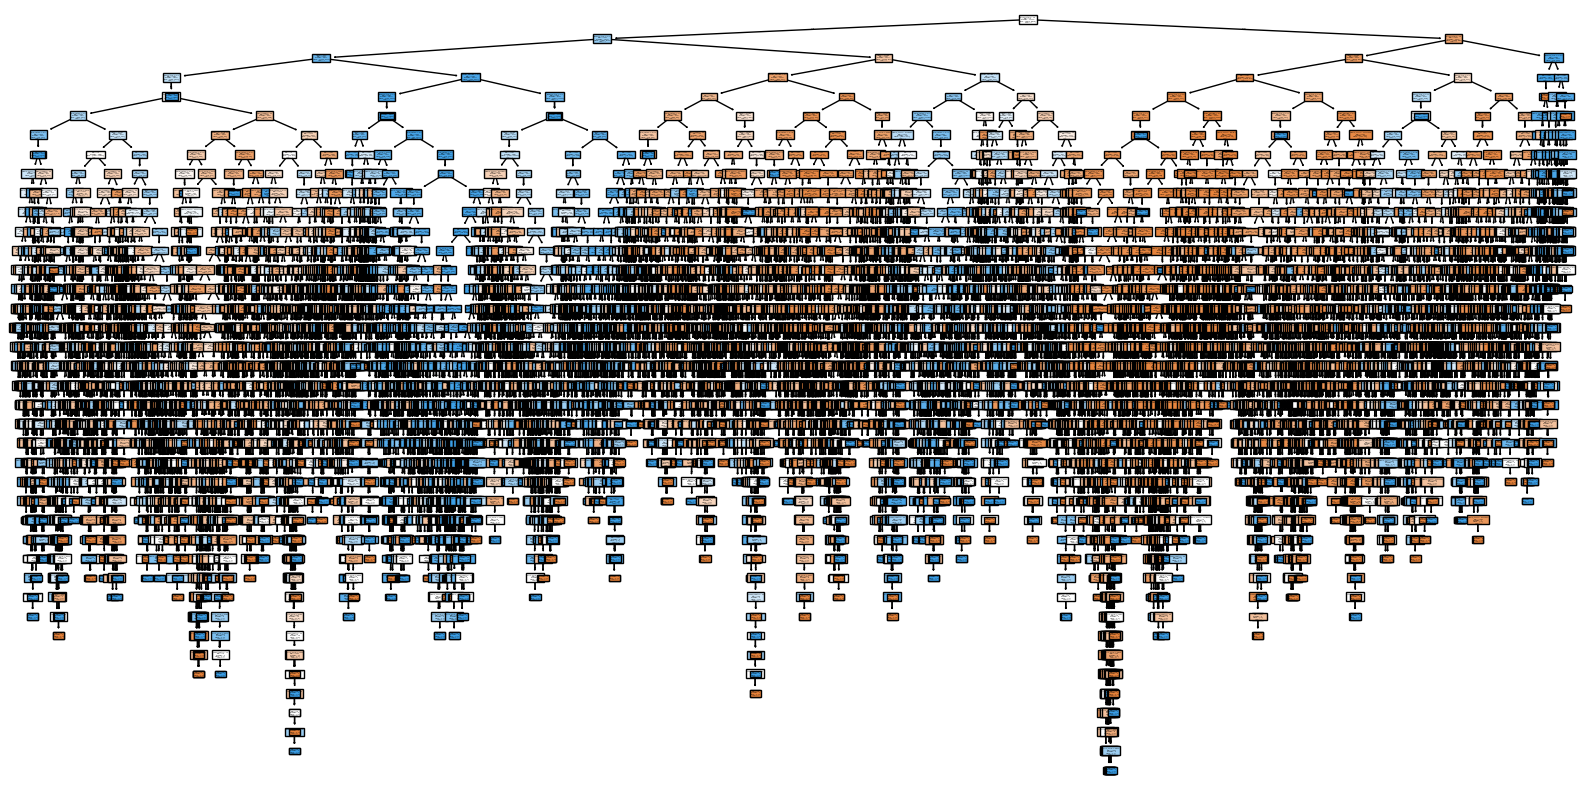

In [39]:
plt.figure(figsize=(20,10))
plot_tree(arvore_churn, filled=True, feature_names=X_train.columns, class_names=['0','1'])

Executanto o grafico sem nenhum limite de features é impossivel analisar ou distinguir a profundidade da árvore de descisão.

# 6) Identifique as 2 principais features do modelo.


Text(0.5, 1.0, 'Importância das Features')

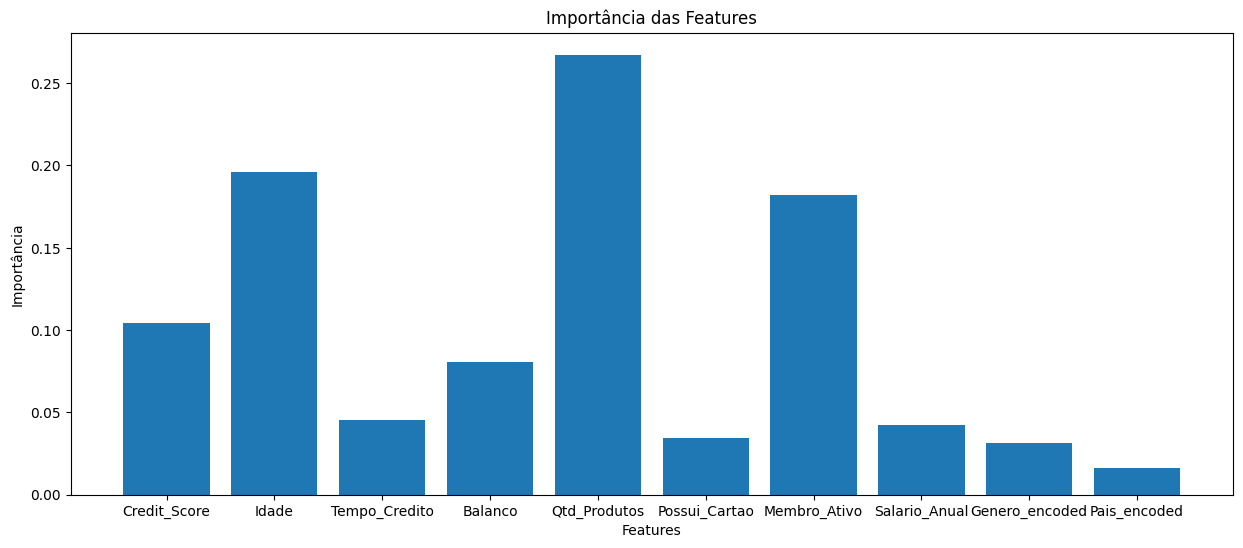

In [49]:
# puxa a importancia das caracteristicas do modelo da árvore de descisão
principais_features = arvore_churn.feature_importances_

# agrega os nomes das caracteristicas
tags_features = X_train.columns

plt.figure(figsize=(15, 6))
plt.bar(tags_features, principais_features)
plt.xlabel('Features')
plt.ylabel('Importância')
plt.title('Importância das Features')

Podemos verificar que a Qtd_Produtos e Membro_Ativo são os dois principais Features da nossa base.

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [50]:
# Atualizando dados com a novas features.
X_Train_reduzido = X_train[['Qtd_Produtos', 'Membro_Ativo']]
X_Test_reduzido = X_test[['Qtd_Produtos', 'Membro_Ativo']]

# Realizando um novo treino
arvore_churn_reduzido = DecisionTreeClassifier(criterion='gini', random_state=0)
arvore_churn_reduzido.fit(X_Train_reduzido, y_train)



DecisionTreeClassifier(random_state=0)

[Text(0.38333333333333336, 0.9166666666666666, 'Credit_Score <= 1.5\ngini = 0.5\nsamples = 117950\nvalue = [58975, 58975]\nclass = 0'),
 Text(0.2, 0.75, 'Idade <= 1.0\ngini = 0.431\nsamples = 72964\nvalue = [22887, 50077]\nclass = 1'),
 Text(0.2916666666666667, 0.8333333333333333, 'True  '),
 Text(0.13333333333333333, 0.5833333333333334, 'Idade <= 0.0\ngini = 0.307\nsamples = 53541\nvalue = [10132, 43409]\nclass = 1'),
 Text(0.06666666666666667, 0.4166666666666667, 'gini = 0.392\nsamples = 37868\nvalue = [10132.0, 27736.0]\nclass = 1'),
 Text(0.2, 0.4166666666666667, 'gini = 0.0\nsamples = 15673\nvalue = [0, 15673]\nclass = 1'),
 Text(0.26666666666666666, 0.5833333333333334, 'gini = 0.451\nsamples = 19423\nvalue = [12755, 6668]\nclass = 0'),
 Text(0.5666666666666667, 0.75, 'Credit_Score <= 2.5\ngini = 0.317\nsamples = 44986\nvalue = [36088, 8898]\nclass = 0'),
 Text(0.475, 0.8333333333333333, '  False'),
 Text(0.4, 0.5833333333333334, 'Idade <= 1.0\ngini = 0.269\nsamples = 42771\nvalue

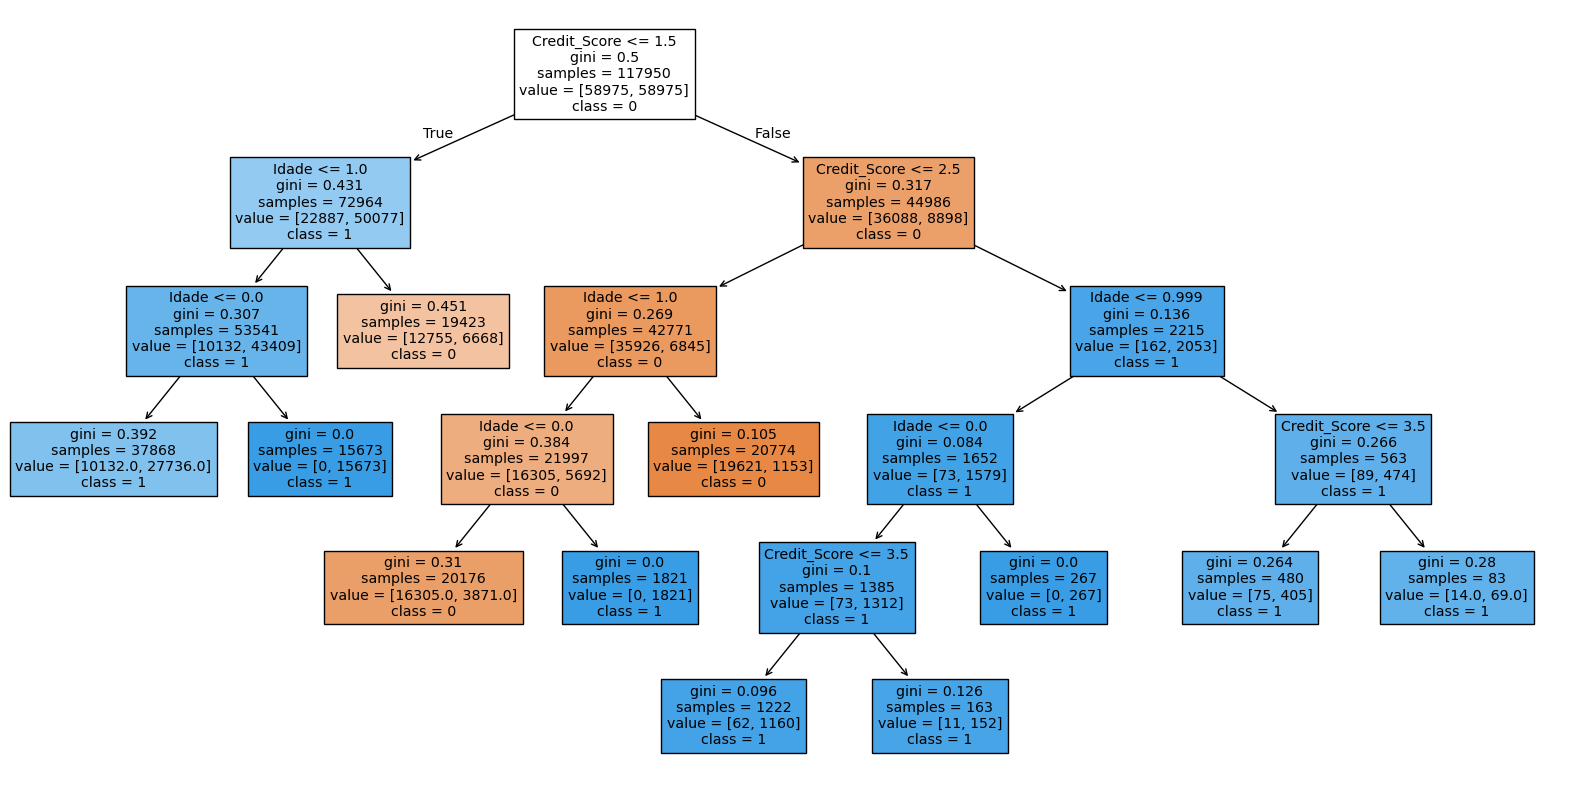

In [51]:
plt.figure(figsize=(20,10))
plot_tree(arvore_churn_reduzido, filled=True, feature_names=X_train.columns, class_names=['0','1'])

Alem de volocidade que foi praticamente estantaneo o carregamento comparado a quase 10 minutos para obter o grafico, nesse podemos ver as caixas com as informações de cada descisão e os valores dentro delas.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

In [58]:
previsoes_Reduzido_teste = arvore_churn_reduzido.predict(X_Test_reduzido)

accuracy = accuracy_score(y_test, previsoes_Reduzido_teste)
recall = recall_score(y_test, previsoes_Reduzido_teste)

print("Acurácia:", accuracy)
print("Recall:", recall)

Acurácia: 0.7840494243190115
Recall: 0.6305418719211823


Resultado de Naive Bayes:
Acurácia: 55%
Recall: 64%

Comparando com o Naive Bayes a arvore de descisão aprensentou um Acurácia de 78% uma grande efficiencia, e o recall parecido somente uma diferença de 1% a menos.

Com essa informação foi uma melhora significativa se levamos em consideração a Acurácia.